In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from numba import jit, float64, int64
from time import time

(0, 1.25)

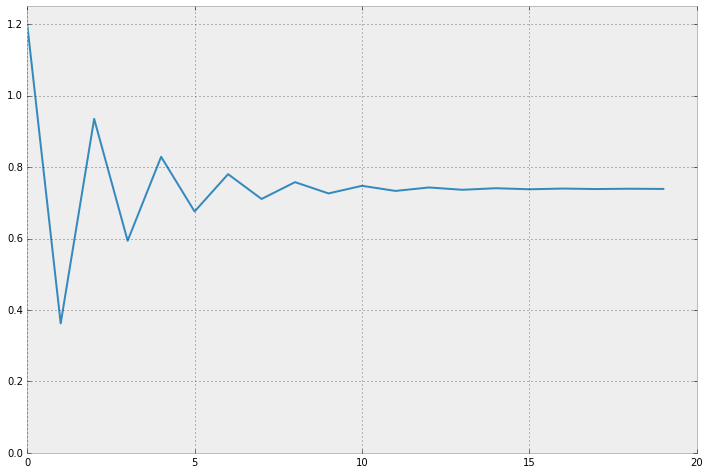

In [2]:
# Plot the first N values of an iterated map,
# starting from x0

# Define a map
def f(x):
    return np.cos(x)

# Parameters
N  = 20
x0 = 1.2

# Some arrays
t = np.arange(N)
x = np.zeros(N)

# Set initial value and iterate
x[0] = 1.2
for i in range(1, N):
    x[i] = f(x[i-1])

# Plot
fig = plt.figure(figsize = (12,8))
plt.plot(t, x)
plt.ylim(0, 1.25)

(0, 1.25)

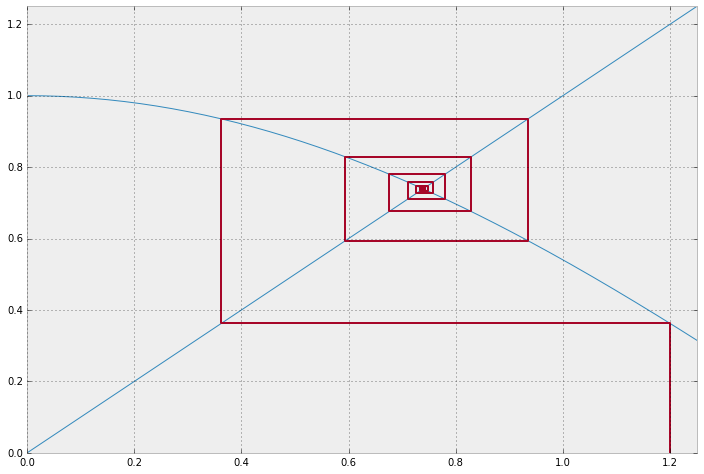

In [3]:
# Draw a cobweb diagram

# Define a map
def f(x):
    return np.cos(x)

# Parameters
N  = 20
x0 = 1.2

# First, draw line with slope 1, and the map
# Set figure size
fig = plt.figure(figsize = (12,8))
# x-values for plotting only
x   = np.linspace(0, 2, 200)
# Plot map, and keep line handle to get color
l,  = plt.plot(x, f(x), lw = 1)
# Plot diagonal with same color
plt.plot(x, x, lw = 1, c = l.get_color())

# Then, draw the cobweb
X  = [x0]
Y  = [0.0]
for i in range(N):
    # Add point on the curve y=f(x)
    X.append(X[-1])
    Y.append(f(X[-1]))
    # Add point on the curve y=x
    X.append(Y[-1])
    Y.append(Y[-1])

plt.plot(X, Y)
plt.xlim(0, 1.25)
plt.ylim(0, 1.25)

In [4]:
# For convenience, make a function that will plot
# both the sequence of values, and the cobweb diagram.
# Make it general, so it can be applied to any 1d map
def twoplots(f, *args, x0 = 0.1, N = 30, alpha = 0.8):
    # The 'magic' argument *args allow the
    # function to take any number of extra arguments
    # *args will be passed on to the map

    # Set up figure with two subplots
    fig, ax = plt.subplots(ncols = 2, figsize = (12,5))
    
    # Do N iterations of map, and plot sequence
    t = np.arange(N)
    xn = np.zeros(N)
    xn[0] = x0
    for i in range(1, N):
        xn[i] = f(xn[i-1], *args)
    ax[0].plot(t, xn)
    ax[0].set_ylim(0,1)

    # Cobweb diagram
    # First, draw line with slope 1, and the map
    x   = np.linspace(0, 2, 200)
    l,  = ax[1].plot(x, f(x, *args), lw = 1)
    ax[1].plot(x, x, lw = 1, c = l.get_color())

    # Then, draw the cobweb
    X  = [x0]
    Y  = [0.0]
    for i in range(N):
        # Add point on the curve y=f(x)
        X.append(X[-1])
        Y.append(f(X[-1], *args))
        # Add point on the curve y=x
        X.append(Y[-1])
        Y.append(Y[-1])

    for i in range(1, len(X)):
        ax[1].plot(X[i-1:i+1], Y[i-1:i+1], c = '#A60628', alpha = alpha)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)

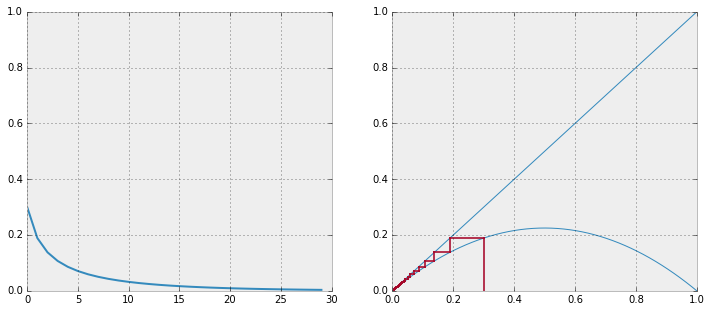

In [5]:
# For values of r smaller than 1, x=0 is a stable fixed point

def f(x, r):
    return r*x*(1-x)

# Passing r as the second argument means it will
# get passed along to f via *args
r = 0.9
twoplots(f, r, x0 = 0.3)

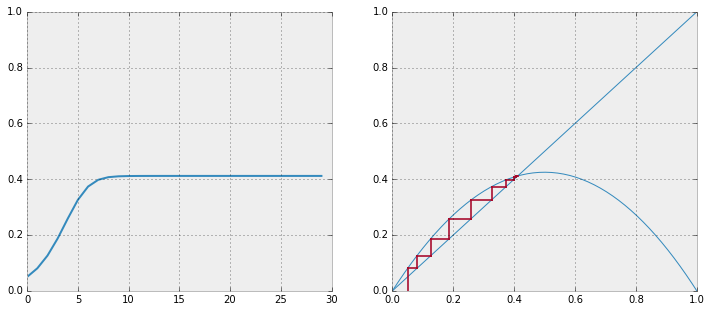

In [6]:
# For values of r such that 1 < r < 3,
# there is a nonzero stable fixed point
# Orbits approach x* monotonously for r < 2
r = 1.7
twoplots(f, r, x0 = 0.05)

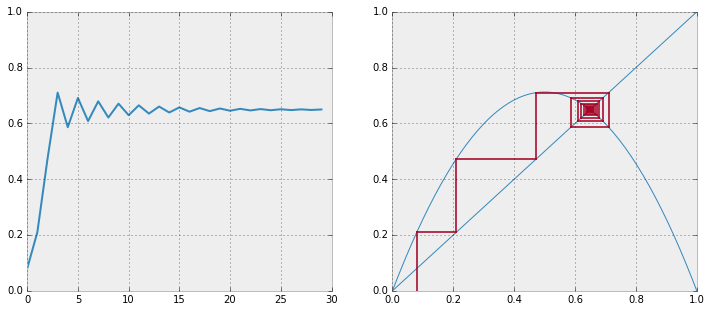

In [7]:
# For values of r such that 1 < r < 3,
# there is a nonzero stable fixed point
# Orbits approach x* with decaying oscillations for r > 2
r = 2.85
twoplots(f, r, x0 = 0.08)

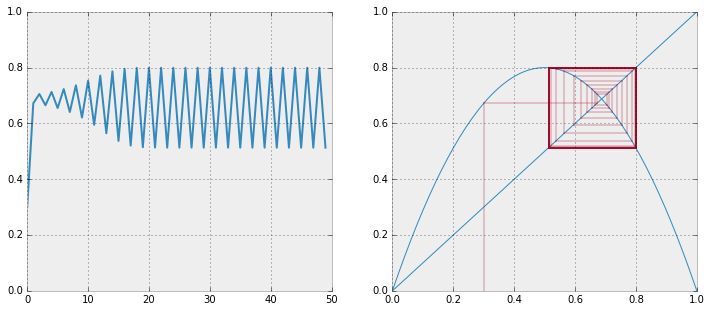

In [8]:
# For values of r > 3, interesting things happen
# with 3 < r < 3.44949 (approximately),
# there is a cycle of period 2
r = 3.2
twoplots(f, r, x0 = 0.3, N = 50, alpha = 0.2)

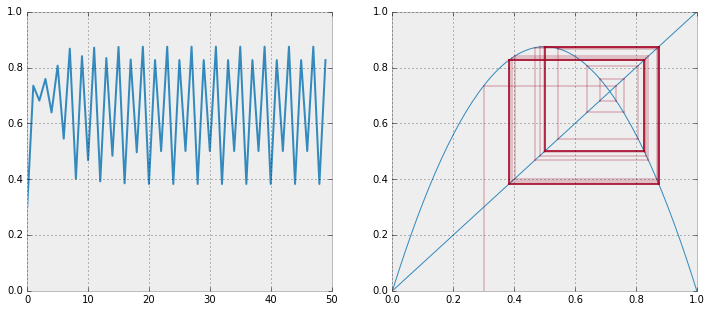

In [9]:
# with 344949 < r < 3.54409 (approximately),
# there is a cycle of period 4
r = 3.5
twoplots(f, r, x0 = 0.3, N = 50, alpha = 0.2)

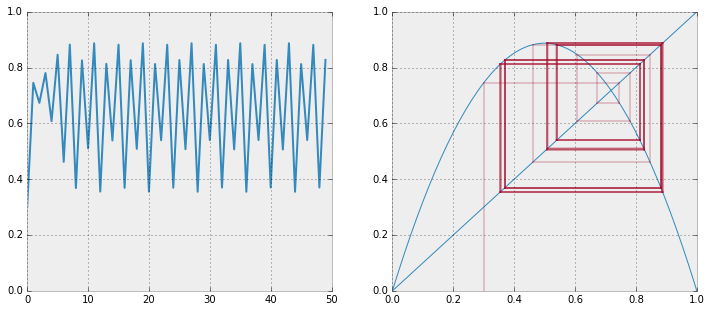

In [10]:
# with 3.54409 < r < 3.5644 (approximately),
# there is a cycle of period 8
r = 3.55
twoplots(f, r, x0 = 0.3, N = 50, alpha = 0.2)

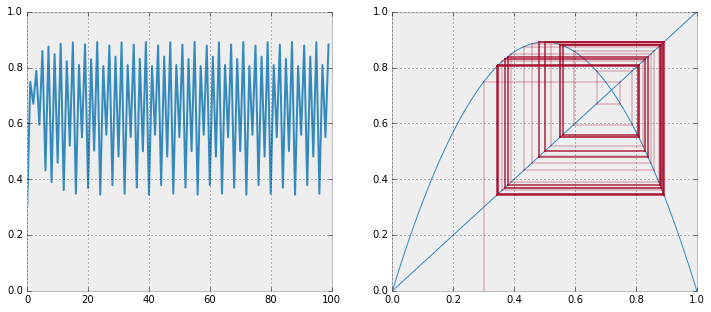

In [11]:
# with 3.5644 < r < 3.568759 (approximately),
# there is a cycle of period 16
r = 3.567
twoplots(f, r, x0 = 0.3, N = 100, alpha = 0.2)

In [12]:
# Finally, we want to plot the bifurcation diagram
# of the logistic map. This is implemented approximately
# as described in the subsection "Chaos and periodic windows"
# in section 10.2 of Strogatz

# Define the map
@jit(nopython = True)
def f(x, r):
    return r*x*(1-x)

# This function first takes an initial N0 steps,
# to reach "steady state", then takes another N1 steps,
# and returns the list of points
@jit(nopython = True)
def orbit(r, x0 = 0.5, N0=300, N1=2000):
    # use x0 as temporary variable,
    # overwritten at each iteration
    # Make N0 initial iterations
    for i in range(N0):
        x0 = f(x0, r)
    # Then make N1 additional iterations, storing results
    orb = np.zeros(N1)
    orb[0] = x0
    for i in range(1, N1):
        orb[i] = f(orb[i-1], r)
    return orb

# Again, we make the function general so it can be applied
# to other maps
# (although we limit ourselves to maps with one parameter, r)
# (try for example the Tent map (Fig. 10.5.1 in Strogatz))
# Note that here, f is treated as a globally available function,
# rather than being passed as an argument. The reason is that
# I can't get numba's just-in-time compiler to cooperate when
# I try to send f as an argument.
# Just-in-time compiling these three functions gains a factor of
# about 20 or so in speed 
@jit(nopython = True)
def bifurcation(X, R, x0 = 0.5):
    # This will hold the values to be plotted
    c  = np.zeros((R.size, X.size))
    for i, r in enumerate(R):
        orb = orbit(r)
        hist, bins = np.histogram(orb, bins = X)
        c[i,1:] = hist
    return c

(0.0, 1.0)

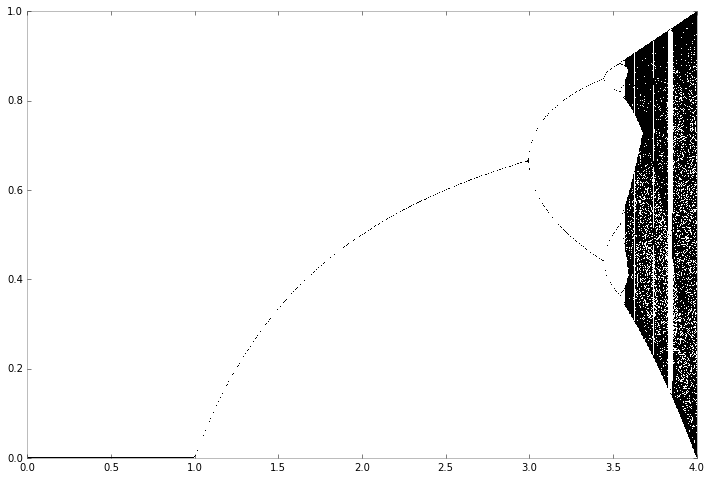

In [13]:
# vectors of x-values and r-values
Nr = 1000
Nx = 1000
X  = np.linspace(0, 1, Nx)
R  = np.linspace(0, 4, Nr)
c = bifurcation(X, R)

fig = plt.figure(figsize = (12,8))
# Use logical test to plot any cell that
# has a nonzero value as black, others as white
plt.pcolormesh(R,X, c.T > 0.0, cmap = 'Greys')
# Set plot limits
plt.xlim(R[0], R[-1])
plt.ylim(X[0], X[-1])

(0.0, 1.0)

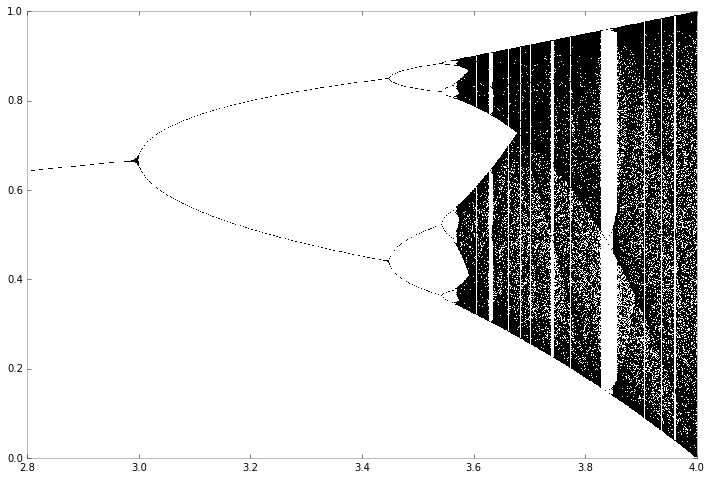

In [14]:
# Create a zoomed in version

# vectors of x-values and r-values
Nr = 1000
Nx = 1000
X  = np.linspace(0, 1, Nx)
R  = np.linspace(2.8, 4, Nr)
c = bifurcation(X, R)

fig = plt.figure(figsize = (12,8))
# Use logical test to plot any cell that
# has a nonzero value as black, others as white
plt.pcolormesh(R,X, c.T > 0.0, cmap = 'Greys')
# Set plot limits
plt.xlim(R[0], R[-1])
plt.ylim(X[0], X[-1])

(0.13, 0.17999999999999999)

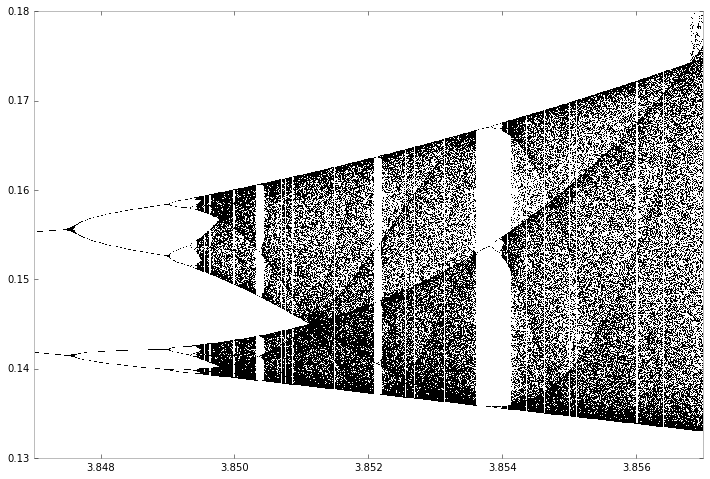

In [15]:
# Create an even more zoomed in version,
# displaying self-similarity to the original

# vectors of x-values and r-values
Nr = 1000
Nx = 1000
X  = np.linspace(0.13, 0.18, Nx)
R  = np.linspace(3.847, 3.857, Nr)
c = bifurcation(X, R)

fig = plt.figure(figsize = (12,8))
# Use logical test to plot any cell that
# has a nonzero value as black, others as white
plt.pcolormesh(R,X, c.T > 0.0, cmap = 'Greys')
# Set plot limits
plt.xlim(R[0], R[-1])
plt.ylim(X[0], X[-1])